In [ ]:
import pandas as pd

df=pd.read_csv('words_en.csv')
df.info('words_en.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33585 entries, 0 to 33584
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  33585 non-null  int64 
 1   words       33579 non-null  object
dtypes: int64(1), object(1)
memory usage: 524.9+ KB


In [ ]:
df.head()

,Unnamed: 0,words
0,0,laughter
1,1,rosebud
2,2,scolds
3,3,airth
4,4,state


In [ ]:
df=pd.read_csv('words_hn.csv')
df.info('words_hn.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  111 non-null    int64 
 1   words       111 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.9+ KB


In [ ]:
df.head()

,Unnamed: 0,words
0,1,हंसी
1,2,फूल
2,3,गर्मी
3,4,खुशी
4,5,बच्चा


In [ ]:
df=pd.read_csv('words_ud.csv')
df.info('words_ud.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  200 non-null    int64 
 1   words       200 non-null    object
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [ ]:
df.head()

,Unnamed: 0,words
0,1,سلام
1,2,شکریہ
2,3,براہ کرم
3,4,ہاں
4,5,نہیں


In [ ]:
df=pd.read_csv('words_pn.csv')
df.info('words_pn.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  105 non-null    int64 
 1   words       105 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [ ]:
df.head()

,Unnamed: 0,words
0,1,ਪਿੰਡ
1,2,ਮਾਂ
2,3,ਪਿਤਾ
3,4,ਪੁਤਰ
4,5,ਕੁੜੀ


In [ ]:
df=pd.read_csv('words_fr.csv')
df.info('words_fr.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  120 non-null    int64 
 1   words       120 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
df.head()

,Unnamed: 0,words
0,1,Bonjour
1,2,Merci
2,3,Chien
3,4,Maison
4,5,Pomme


In [ ]:
# pre_process.py
import string
import re

class pre_process:
    def __init__(self):
        self.punctuation_en = string.punctuation
        self.punctuations_list = string.punctuation

    def process(self, text, lan="en"):                                     # # Process the input text based on the specified language
        if lan == "en":
            return self._preprocess_english(text)
        elif lan == "hn":
            return self._preprocess_hindi(text)
        elif lan == "ud":
            return self._preprocess_urdu(text)
        elif lan == "pn":
            return self._preprocess_punjabi(text)
        elif lan == "fr":
            return self._preprocess_french(text)

    def _preprocess_hindi(self, text):
        text = self._remove_punctuations(text)
        return text

    def _preprocess_urdu(self, text):
        text = self._remove_punctuations(text)
        return text

    def _preprocess_punjabi(self, text):
        text = self._remove_punctuations(text)
        return text

    def _preprocess_french(self, text):
        text = self._remove_punctuations(text)
        return text

    def _preprocess_english(self, text):
        text = text.lower()
        text = text.lstrip()
        text = text.rstrip()
        text = "".join([char for char in text if char not in self.punctuation_en])
        return text

    def _remove_punctuations(self, text):
        translator = str.maketrans('', '', self.punctuations_list)
        return text.translate(translator)


In [ ]:
# edit distance.py
#The edit distance is a fundamental measure of sequence similarity, defined as the minimum number of character
# insertions, deletions, and substitutions needed to transform one string into the other.
import numpy as np
import string

class edit_distance:
  def __init__(self):


    pass

  def get_score(self,pred,ref):



    costs=np.zeros((1+len(pred),1+len(ref)))
    self.backtrace = np.zeros((1+len(pred),1+len(ref)))

    costs[0]=[j for j in range(0,len(ref)+1)]
    self.backtrace[ : ][0]=2

    costs[: ,0]=[j for j in range(0,len(pred)+1)]
    self.backtrace[ : ][0]=3

    self.backtrace[0][0]=10 #None

    for row in range(1,len(pred)+1):

     for col in range(1,len(ref)+1):
        if pred[row-1]==ref[col-1]:
          costs[row][col]=costs[row-1][col-1]
          self.backtrace[row][col]=1
        else:
          substitution=costs[row-1][col-1]
          delete=costs[row-1][col]
          insert=costs[row][col-1]
          final_cost=min(delete,insert,substitution)
          costs[row][col]=final_cost+1

          if final_cost==delete:
            self.backtrace[row][col]=3
          elif final_cost==insert:
            self.backtrace[row][col]=2
          elif final_cost==substitution:
            self.backtrace[row][col]=4


    return(costs[-1][-1])/len(ref)

    def get_detail(self):
      i,j=len(pred),len(ref)
      self.num_same,self.num_del,self.num_sub,self.num_ins=0,0,0,0
      while i>0 or j>0:
        if self.backtrace[i][j]==1:
          i-=1
          j-=1
          self.num_same+=1
        if self.backtrace[i][j]==4:
          i-=1
          j-=1
          self.num_sub+=1
        if self.backtrace[i][j]==2:
          j-=1
          self.num_ins+=1
        if self.backtrace[i][j]==1:
          i-=1
          self.num_del+=1
    return {
        "delete":self.num_del,
        "insert":self.num_ins,
        "substitution":self.num_sub,
        "same words":self.num_same

     }










In [ ]:
#Jaccard Similarity is a common proximity measurement used to compute the similarity between two objects, such as two text documents.
class jaccard_similarity:
	def __init__(self, n_gram = 2):
		self.n_gram = 2



	def get_score(self, writer, ref):
		ref_n_gram = set(ref[index : index + self.n_gram] for index in range(0 , len(ref) - self.n_gram + 1))
		writer_n_gram = set(writer[index : index + self.n_gram] for index in range(0 , len(writer) - self.n_gram + 1))

		intersection = ref_n_gram.intersection(writer_n_gram)
		union = ref_n_gram.union(writer_n_gram)


		jaccard__similarity = len(intersection) / len(union)
		return  jaccard__similarity

In [ ]:
class get_words:
    def __init__(self):
        self.words_en = pd.read_csv("words_en.csv")["words"].dropna()
        self.words_en = self.words_en.to_list()
        self.words_hn = pd.read_csv("words_hn.csv")["words"].dropna()
        self.words_hn = self.words_hn.to_list()
        self.words_ud = pd.read_csv("words_ud.csv")["words"].dropna()
        self.words_ud = self.words_ud.to_list()
        self.words_pn = pd.read_csv("words_pn.csv")["words"].dropna()
        self.words_pn = self.words_pn.to_list()
        self.words_fr = pd.read_csv("words_fr.csv")["words"].dropna()
        self.words_fr = self.words_fr.to_list()
        self.edit_distance = edit_distance()
        self.jaccard_similarity = jaccard_similarity()

    def get(self, writer, lan):
        if lan == "en":
            if writer in self.words_en:
                print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

            result_ed = dict()
            result_js = dict()
            print("Please wait...")

            for word in self.words_en:
                if isinstance(len(word), type(float)):
                    continue
                else:
                    result_ed.update({word: self.edit_distance.get_score(writer, word)})
                    result_js.update({word: self.jaccard_similarity.get_score(writer, word)})

            result_ed = dict(sorted(result_ed.items(), key=lambda item: item[1]))
            result_js = dict(sorted(result_js.items(), key=lambda item: item[1]))

            return {
                "edit distance": dict(list(result_ed.items())[:5]),
                "jaccard similarity": dict(reversed(list(dict(list(result_js.items())[-5:]).items())))
				,
            }

        if lan == "hn":
            if writer in self.words_hn:
                print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

            result_ed = dict()
            result_js = dict()
            print("Please wait...")

            for word in self.words_hn:
                if isinstance(len(word), type(float)):
                    continue
                else:
                    result_ed.update({word: self.edit_distance.get_score(writer, word)})
                    result_js.update({word: self.jaccard_similarity.get_score(writer, word)})

            if writer in result_ed:
                result_ed.pop(writer)

            if writer in result_js:
                result_js.pop(writer)

            result_ed = dict(sorted(result_ed.items(), key=lambda item: item[1]))
            result_js = dict(sorted(result_js.items(), key=lambda item: item[1]))

            return {
                "edit distance": dict(list(result_ed.items())[:5]),
                "jaccard similarity": dict(reversed(list(dict(list(result_js.items())[-5:]).items())))
						,
            }

        if lan == "ud":
            if writer in self.words_ud:
                print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

            result_ed = dict()
            result_js = dict()
            print("Please wait...")

            for word in self.words_ud:
                if isinstance(len(word), type(float)):
                    continue
                else:
                    result_ed.update({word: self.edit_distance.get_score(writer, word)})
                    result_js.update({word: self.jaccard_similarity.get_score(writer, word)})

            if writer in result_ed:
                result_ed.pop(writer)

            if writer in result_js:
                result_js.pop(writer)

            result_ed = dict(sorted(result_ed.items(), key=lambda item: item[1]))
            result_js = dict(sorted(result_js.items(), key=lambda item: item[1]))

            return {
                "edit distance": dict(list(result_ed.items())[:5]),
                "jaccard similarity": dict(reversed(list(dict(list(result_js.items())[-5:]).items())))
						,
            }

        if lan == "pn":
            if writer in self.words_pn:
                print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

            result_ed = dict()
            result_js = dict()
            print("Please wait...")

            for word in self.words_pn:
                if isinstance(len(word), type(float)):
                    continue
                else:
                    result_ed.update({word: self.edit_distance.get_score(writer, word)})
                    result_js.update({word: self.jaccard_similarity.get_score(writer, word)})

            if writer in result_ed:
                result_ed.pop(writer)

            if writer in result_js:
                result_js.pop(writer)

            result_ed = dict(sorted(result_ed.items(), key=lambda item: item[1]))
            result_js = dict(sorted(result_js.items(), key=lambda item: item[1]))

            return {
                "edit distance": dict(list(result_ed.items())[:5]),
                "jaccard similarity": dict(reversed(list(dict(list(result_js.items())[-5:]).items())))
						,
            }

        if lan == "fr":
            if writer in self.words_fr:
                print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

            result_ed = dict()
            result_js = dict()
            print("Please wait...")

            for word in self.words_fr:
                if isinstance(len(word), type(float)):
                    continue
                else:
                    result_ed.update({word: self.edit_distance.get_score(writer, word)})
                    result_js.update({word: self.jaccard_similarity.get_score(writer, word)})

            if writer in result_ed:
                result_ed.pop(writer)

            if writer in result_js:
                result_js.pop(writer)

            result_ed = dict(sorted(result_ed.items(), key=lambda item: item[1]))
            result_js = dict(sorted(result_js.items(), key=lambda item: item[1]))

            return {
                "edit distance": dict(list(result_ed.items())[:5]),
                "jaccard similarity": dict(reversed(list(dict(list(result_js.items())[-5:]).items())))
						,
            }

please enter a language (en for english / hn for hindi / ud for urdu / pn for punjabi / fr for french): en
please enter words: fly
This word is correct, but maybe this is not what you mean. We will display similar words that you might mean
This word is correct, but maybe this is not what you mean. We will display similar words that you might mean
Please wait...
    edit distance model
     1 ----> fly
     2 ----> fry
     3 ----> sly
     4 ----> ply
     5 ----> folly
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    jaccard similarity model
     1 ----> fly
     2 ----> flyin’
     3 ----> flatly
     4 ----> flying
     5 ----> ply


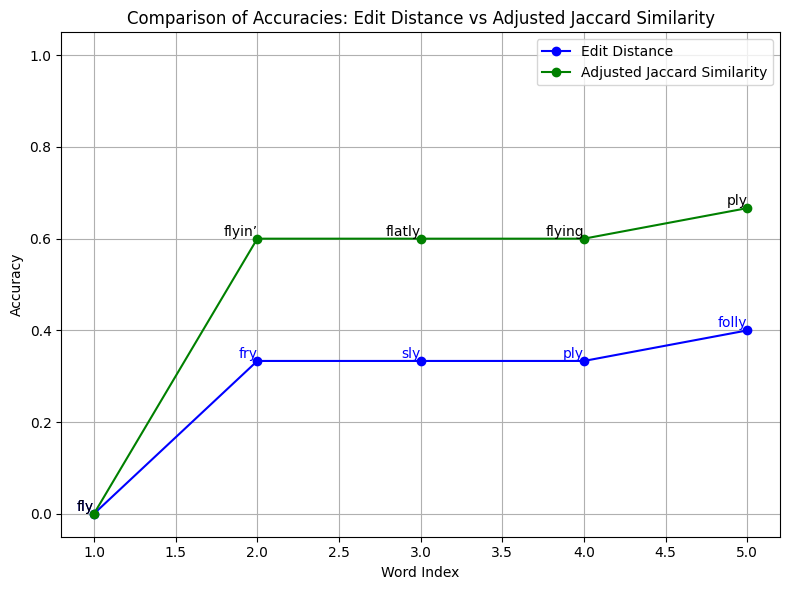

Closeness to word according to edit_distance:
0.0
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.4


Closeness to word according to Jaccard Similarity:
0.0
0.6
0.6
0.6
0.6666666666666667


In [ ]:
def main():
    gw = get_words()
    pr = pre_process()
    lang_input = input("please enter a language (en for english / hn for hindi / ud for urdu / pn for punjabi / fr for french): ")

    while lang_input.lower() not in ["en", "hn", "ud", "pn", "fr"]:
        lang_input = input("please enter a language: (en / hn / ud / pn / fr): ")

    text = input("please enter words: ")
    text = pr.process(text, lang_input)
    print("This word is correct, but maybe this is not what you mean. We will display similar words that you might mean")

    result = gw.get(text, lang_input)

    print("    edit distance model")
    for index, word in enumerate(result["edit distance"]):
        print(f"     {index + 1} ----> {word}")

    print("^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^")

    print("    jaccard similarity model")
    for index, word in enumerate(result["jaccard similarity"]):
        print(f"     {index + 1} ----> {word}")



    edit_distance_results = result["edit distance"]
    jaccard_similarity_results = result["jaccard similarity"]

    # Extract the edit distance and Jaccard similarity scores
    edit_distance_accuracies = list(edit_distance_results.values())
    jaccard_similarity_accuracies = list(jaccard_similarity_results.values())

    # Adjust Jaccard similarity scores for plotting
    adjusted_jaccard_scores = [1 - score for score in jaccard_similarity_accuracies]

    # Plotting both edit distance and adjusted Jaccard similarity accuracies
    import matplotlib.pyplot as plt


    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.sans-serif'] = ['Path_to_Your_Font']
    # !pip install --upgrade matplotlib

    plt.figure(figsize=(8, 6))

    # Line plot for edit distance accuracies with blue color and solid line style
    edit_line, = plt.plot(range(1, len(edit_distance_accuracies) + 1), edit_distance_accuracies, marker='o', linestyle='-', color='blue', label='Edit Distance')

    # Line plot for adjusted Jaccard similarity scores with green color
    plt.plot(range(1, len(adjusted_jaccard_scores) + 1), adjusted_jaccard_scores, marker='o', linestyle='-', color='green', label='Adjusted Jaccard Similarity')

    # Annotate points with words for Edit Distance
    for i, (word, edit_acc) in enumerate(zip(edit_distance_results.keys(), edit_distance_accuracies)):
        edit_color = edit_line.get_color()  # Get color of Edit Distance line
        plt.text(i + 1, edit_acc, f'{word}', ha='right', va='bottom', color=edit_color, fontsize=10)  # Edit Distance annotations

    # Annotate points with words for Adjusted Jaccard Similarity
    for i, (word, adj_jaccard_acc) in enumerate(zip(jaccard_similarity_results.keys(), adjusted_jaccard_scores)):
        plt.text(i + 1, adj_jaccard_acc, f'{word}', ha='right', va='bottom', color='black', fontsize=10)  # Adjusted Jaccard Similarity annotations

    # Set y-axis limits to accommodate annotations
    plt.ylim(-0.05, 1.05)

    plt.title('Comparison of Accuracies: Edit Distance vs Adjusted Jaccard Similarity')
    plt.xlabel('Word Index')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Closeness to word according to edit_distance:")
    for accuracy in edit_distance_accuracies:
        print(accuracy)
    print("\n")

    print("Closeness to word according to Jaccard Similarity:")
    for accuracy in jaccard_similarity_accuracies:
        print(1-accuracy)




main()


In [ ]:
word1 = "fly"
word2 = "fry"
jaccard_similarity= intersec

class jaccard_similarity:
	def __init__(self, n = 2):
		self.n = 2



	def get_score(self, word1, ref):
		ref_n = set(ref[index : index + self.n_gram] for index in range(0 , len(ref) - self.n_gram + 1))
		writer_n = set(word1[index : index + self.n_gram] for index in range(0 , len(word1) - self.n_gram + 1))

		intersection = ref_n.intersection(word1_n)
		union = ref_n.union(word2_n)


		jaccard__similarity = len(intersection) / len(union)
		return  jaccard__similarity